# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

data = pd.read_csv("datasets/Mall_Customers.csv")

# 2. Overview dataset

In [2]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(data)
profile

# 3. Data processing

In [6]:
le = LabelEncoder()
en_features = ['Gender']
for i in en_features:
    data[i] = le.fit_transform(data[i])
data['Gender']

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int32

5


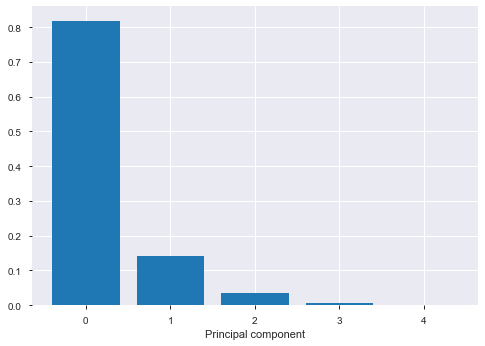

In [7]:
pca = PCA()
pca.fit(data)
exp_variance = pca.explained_variance_ratio_

fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal component')

print(len(data.columns))

In [8]:
pca = PCA(n_components=4)
X_train = pca.fit_transform(data)
X_train = pd.DataFrame(X_train)
print(X_train)

              0          1          2          3
0   -109.383941   5.478454 -22.368045  -0.382804
1   -108.202857 -34.931765 -10.777946  -0.919359
2   -107.376292  37.840872 -28.968556  -0.258860
3   -106.007807 -30.562696  -9.741001  -0.873190
4   -104.980323   7.296747 -10.441851  -0.536151
..          ...        ...        ...        ...
195  111.652574 -27.964645   3.771496  15.332012
196  114.615358  24.017825   1.936847  20.197742
197  115.911505 -23.729967  -0.144471  20.085099
198  120.939935  30.859889 -12.718310  29.809249
199  122.297753 -32.853069   0.266300  29.348790

[200 rows x 4 columns]


# 4. KMeans Clustering and Plot

In [9]:
k_means = KMeans()
k_means.fit_predict(X_train)

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3, 4, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 7, 6, 7, 6, 7, 6, 7, 6,
       7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6,
       7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5])

In [10]:
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X_train)
    wcss.append(k_means.inertia_)

In [11]:
wcss

[975463.2166847945,
 387016.8989687669,
 271347.7621795119,
 195352.4503035312,
 157122.43573570484,
 122581.779186507,
 103182.01921474886,
 86005.22777756845,
 76869.10088431706,
 69391.77483398563]

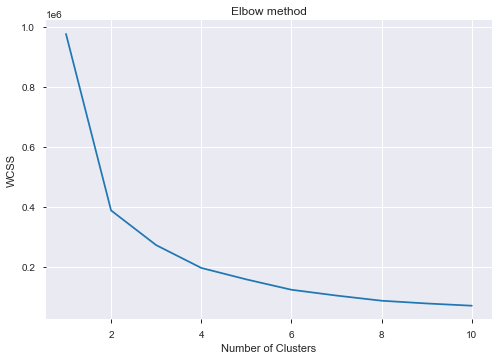

In [12]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

     CustomerID  Gender  Age  Annual_Income_(k$)  Spending_Score_(1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       0   35                 120                      79
196         197       0   45                 126                      28
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[200 rows x 5 columns]


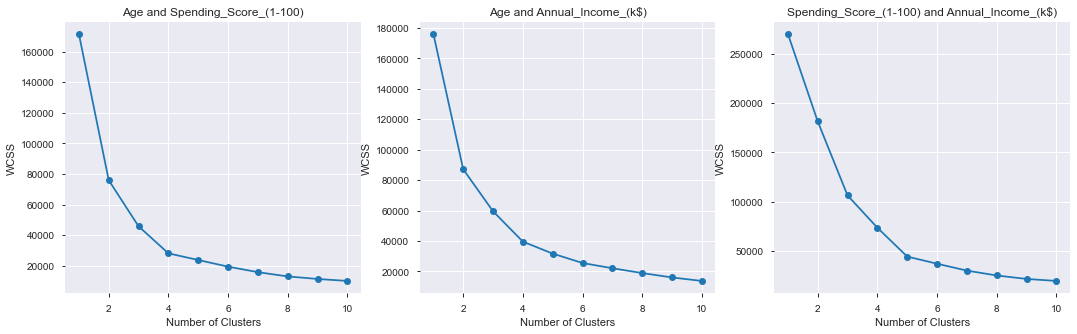

In [13]:
features = ['Age', 'Spending_Score_(1-100)', 'Annual_Income_(k$)']

def draw_elbow_point(X, axes, ai, fi, fj):
    wcss = []
    for i in range(1, 11):
        k_means = KMeans(n_clusters=i)
        k_means.fit(X)
        wcss.append(k_means.inertia_)
    plt.sca(axes[ai])
    plt.plot(range(1, 11), wcss, marker ='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title(f'{features[fi]} and {features[fj]}')

pl_index = 0
fig,axes = plt.subplots(1,len(features),figsize = (18,5))

print(data)
for i in range(len(features)):
    for j in range(i+1, len(features)):
        X = data[[features[i], features[j]]].values 
        draw_elbow_point(X, axes, pl_index, i, j)
        pl_index += 1
plt.show()

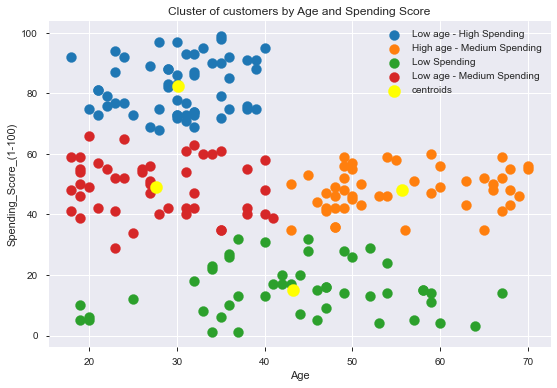

In [14]:
#plot for age and spending score
def KM_Age_and_Spending_plot(n_clusters):
    X = data[[features[0], features[1]]].values
    k_means = KMeans(n_clusters = n_clusters, random_state=10)
    y_predict = k_means.fit_predict(X)
    
    fig, axes = plt.subplots(figsize=(9, 6))
    
    plt.scatter(X[y_predict==0, 0], X[y_predict==0, 1], label='Low age - High Spending', s=100)
    plt.scatter(X[y_predict==1, 0], X[y_predict==1, 1], label='High age - Medium Spending', s=100)
    plt.scatter(X[y_predict==2, 0], X[y_predict==2, 1], label='Low Spending', s=100)
    plt.scatter(X[y_predict==3, 0], X[y_predict==3, 1], label='Low age - Medium Spending', s=100)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='yellow', label='centroids', s=150)
    plt.title('Cluster of customers by Age and Spending Score')
    plt.xlabel(f'{features[0]}')
    plt.ylabel(f'{features[1]}')
    plt.legend(loc='best')
    plt.show()

KM_Age_and_Spending_plot(4)

### The number of cluster is choosen by using elbow method
Accroding to the elbow plot, we choose n_clusters = 4

### Categoried cluster:
- Low age - Medium Spending
- Low age - High Spending
- High age - Medium Spending
- Low Score

### Conclusion:
1. About 50% of customers are classified as medium score, characterized by "spending score". In this category level, the distribution of each age group is uniform
2. the number of people who spending rarely when they are young is very low
3. Middle-aged and old age does not appear to have a high speding score, most people who use money a lot are in the age group of 30 - 40

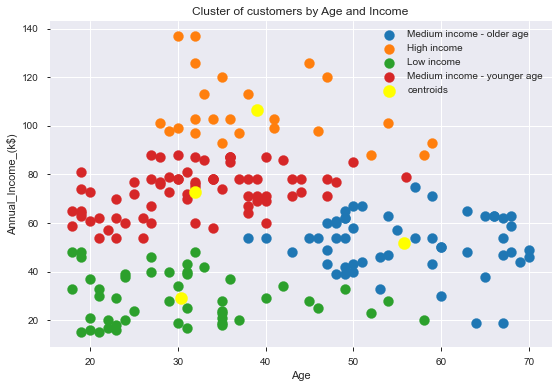

In [15]:
#plot for age and income
def KM_Age_and_Income_plot(n_clusters):
    X = data[[features[0], features[2]]].values
    k_means = KMeans(n_clusters = n_clusters, random_state=10)
    y_predict = k_means.fit_predict(X)
    
    fig, axes = plt.subplots(figsize=(9, 6))
    
    plt.scatter(X[y_predict==0, 0], X[y_predict==0, 1], label='Medium income - older age', s=100)
    plt.scatter(X[y_predict==1, 0], X[y_predict==1, 1], label='High income', s=100)
    plt.scatter(X[y_predict==2, 0], X[y_predict==2, 1], label='Low income', s=100)
    plt.scatter(X[y_predict==3, 0], X[y_predict==3, 1], label='Medium income - younger age', s=100)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='yellow', label='centroids', s=150)
    plt.title('Cluster of customers by Age and Income')
    plt.xlabel(f'{features[0]}')
    plt.ylabel(f'{features[2]}')
    plt.legend(loc='best')
    plt.show()

KM_Age_and_Income_plot(4)

### The number of cluster is choosen by using elbow method
Accroding to the elbow plot, we choose n_clusters = 4

### Categoried cluster:
- Low income
- Medium income - youger age
- Medium income - older age
- High income

### Conclusion:
1. The number of people with high income is relatively small
2. The majority of people with low income are dense distribution between 15-35
3. Young people mostly have low or middle income

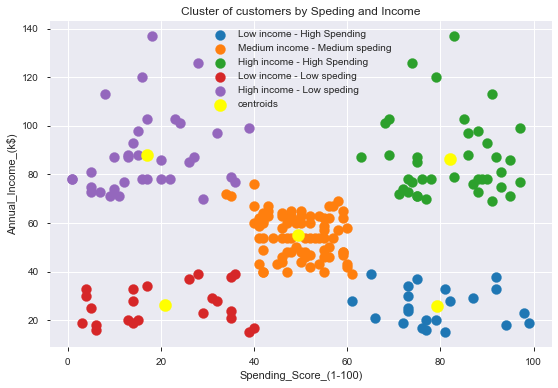

In [16]:
#plot for spending score and income
def KM_Spending_and_Income_plot(n_clusters):
    X = data[[features[1], features[2]]].values
    k_means = KMeans(n_clusters = n_clusters, random_state=10)
    y_predict = k_means.fit_predict(X)
    
    fig, axes = plt.subplots(figsize=(9, 6))
    
    plt.scatter(X[y_predict==0, 0], X[y_predict==0, 1], label='Low income - High Spending', s=100)
    plt.scatter(X[y_predict==1, 0], X[y_predict==1, 1], label='Medium income - Medium speding', s=100)
    plt.scatter(X[y_predict==2, 0], X[y_predict==2, 1], label='High income - High Spending', s=100)
    plt.scatter(X[y_predict==3, 0], X[y_predict==3, 1], label='Low income - Low speding', s=100)
    plt.scatter(X[y_predict==4, 0], X[y_predict==4, 1], label='High income - Low speding', s=100)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='yellow', label='centroids', s=150)
    plt.title('Cluster of customers by Speding and Income')
    plt.xlabel(f'{features[1]}')
    plt.ylabel(f'{features[2]}')
    plt.legend(loc='best')
    plt.show()

KM_Spending_and_Income_plot(5)

### The number of cluster is choosen by using elbow method
Accroding to the elbow plot, we choose n_clusters = 5

### Categoried cluster:
- Low spending - Low income
- Medium spending - Medium income
- Low spending - High income
- High spending - Low income
- High spending - High income

### Conclusion:
1. The majority of customers are Medium spending - Medium income
2. We can clearly distinguish different customer groups based on speding and income characteristics in low medium high level

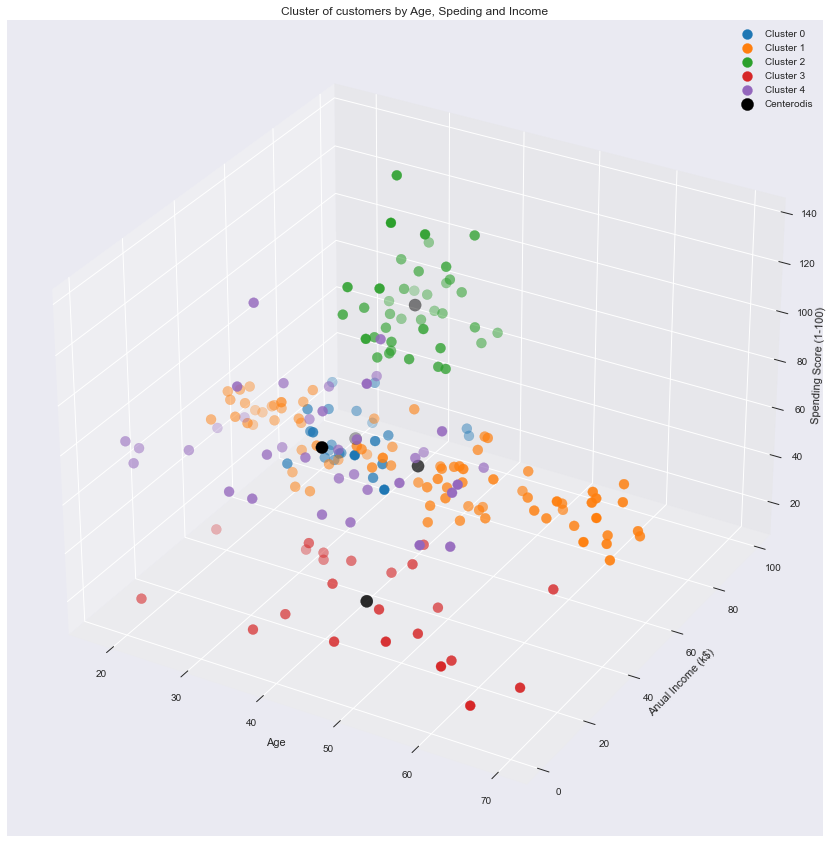

In [17]:
#plot for age, spending score and income
def KM_Age_Income_Spending_plot(n_clusters):
    X = data[features]
    k_means = KMeans(n_clusters = n_clusters, random_state=10)
    y_predict = k_means.fit_predict(X)
    
    fig = plt.figure(figsize = (15,15))
    ax = fig.add_subplot(111, projection = '3d')
    
    ax.scatter(X[y_predict == 0].iloc[:, 0], X[y_predict == 0].iloc[:, 1], X[y_predict == 0].iloc[:, 2], s = 100 , label = "Cluster 0")
    ax.scatter(X[y_predict == 1].iloc[:, 0], X[y_predict == 1].iloc[:, 1], X[y_predict == 1].iloc[:, 2], s = 100 , label = "Cluster 1")
    ax.scatter(X[y_predict == 2].iloc[:, 0], X[y_predict == 2].iloc[:, 1], X[y_predict == 2].iloc[:, 2], s = 100 , label = "Cluster 2")
    ax.scatter(X[y_predict == 3].iloc[:, 0], X[y_predict == 3].iloc[:, 1], X[y_predict == 3].iloc[:, 2], s = 100 , label = "Cluster 3")
    ax.scatter(X[y_predict == 4].iloc[:, 0], X[y_predict == 4].iloc[:, 1], X[y_predict == 4].iloc[:, 2], s = 100 , label = "Cluster 4")
    ax.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], k_means.cluster_centers_[:,2], 
               c = 'black', s = 150, label = 'Centerodis')
    ax.set_title('Cluster of customers by Age, Speding and Income')
    ax.set_xlabel('Age')
    ax.set_ylabel('Anual Income (k$)')
    ax.set_zlabel('Spending Score (1-100)')
    ax.legend(loc='best')
    plt.show()
    
KM_Age_Income_Spending_plot(5)